# Regresja logistyczna, walidacja krzyżowa, krzywe ROC
Autor: Jarosław Żygierewicz

Rozwiązanie: Zofia Hendrysiak

## Część I: regresja logistyczna
Ten notebook pomoże Ci zapoznać się z regresją logistyczną. 

Zbudujemy klasyfikator bazujący na regresji logistycznej. Jego zadaniem będzie określanie prawdopodobieństwa przyjęcia kandydata na studia na podstawie wyników z dwóch egzaminów maturalnych (każdy przeskalowany na zakres 0-100%): z matematyki i z biologii. 

Zanim przejdziemy do właściwych zadań zaimportujmy potrzebne moduły:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so

Zestaw uczący pobieramy z repozytorium github i wczytujemy używając klasy Pandas DataFrame. Najpierw pobieramy repozytorium z github. Repozytorium zawiera kod do naszych ćwiczeń, oraz przykładowe dane w katalogu "dane".

In [ ]:
# odkomentuj zeby pobrac repozytorium, mozesz tez wgrac samemu odpowiedni plik z danymi
!git clone https://github.com/akalinow/uczenie-maszynowe-2021-22

fatal: destination path 'uczenie-maszynowe-2021-22' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv("uczenie-maszynowe-2021-22/dane/reg_log_data.txt", encoding='latin-1', sep=",", names=["matematyka", "biologia", "wynik"])

Aby łatwiej było się nimi posługiwać wydzielmy z nich dane wejściowe jako 'X' i wyjściowe jako 'Y':

## Analiza wizualna danych. 

Pierwszy krok przy analizie danych z użyciem dowolnego algorytmu to ich inspekcja. Korzystając z metod klasy DataFrame proszę:
* wypisać na ekran framgent danych
* narysować rozkłady wszystkich zmiennych wejściowych, w naszym przypadku wyniku egzaminów z matematyki i biologii dla całego zbioru
* narysować rozkłady wszystkich zmiennych wejściowych, w naszym przypadku wyniku egzaminów z matematyki i biologii dla wierszy gdzie wynik=0
* narysować rozkłady wszystkich zmiennych wejściowych, w naszym przypadku wyniku egzaminów z matematyki i biologii dla wierszy gdzie wynik=1

**Wskazówka**: proszę użyć filtrowania danych, tak jak to było robione na pierwszych zajęciach.

    matematyka   biologia  wynik
0    34.623660  78.024693      0
1    30.286711  43.894998      0
2    35.847409  72.902198      0
3    60.182599  86.308552      1
4    79.032736  75.344376      1
..         ...        ...    ...
95   83.489163  48.380286      1
96   42.261701  87.103851      1
97   99.315009  68.775409      1
98   55.340018  64.931938      1
99   74.775893  89.529813      1

[100 rows x 3 columns]


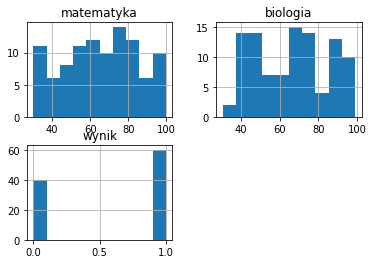

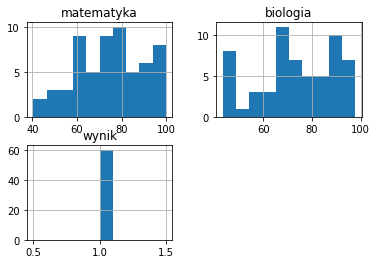

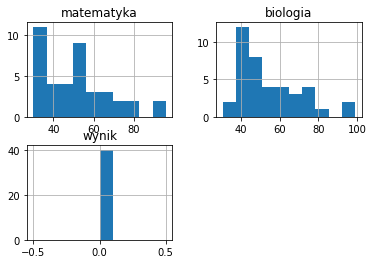

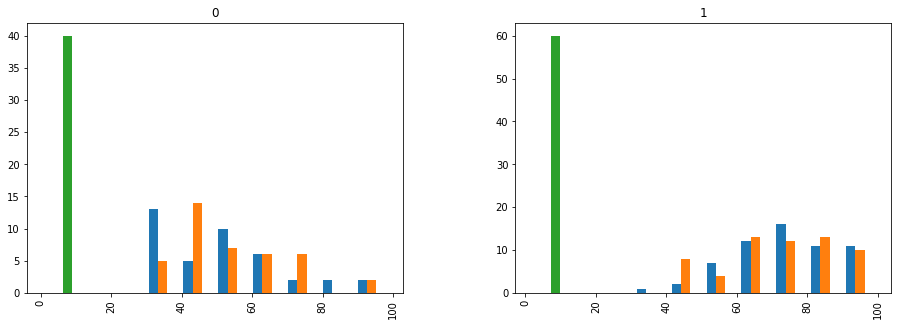

In [ ]:
# uzyj tego do okreslenia rozmiaru obrazka
figsize=(15,5)
# wypisz dataframe
print(df)
# narysuj histogramy dla wszystkich kolumn
df_failed = df[df["wynik"] == 0]
df_passed = df[df["wynik"] == 1]
df.hist()
# wyplotuj tych co zdali
df_passed.hist()
# wyplotuj tych co nie zdali
df_failed.hist()

#To samo co powyżej w jednej linii
df.hist(figsize=figsize, by="wynik");

To co nas interesuje to są jednak korelacje między zmiennymi. Korzystając z przykładu z pierwszych ćwiczeń proszę:

* narysować wykres korelacji między zmiennymi wejściowymi dla pełnych danych, oraz wierszy gdzie wynik=0 lub 1

**Wskazówka**: proszę użyć parametru "hue" funkcji sns.jointplot()

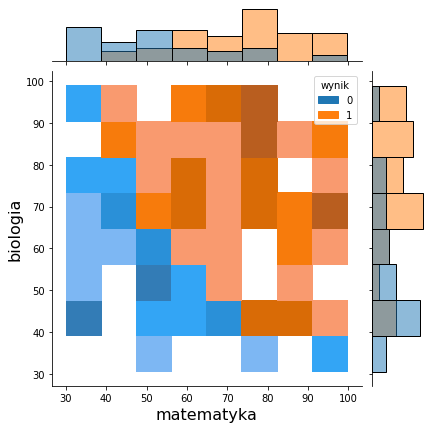

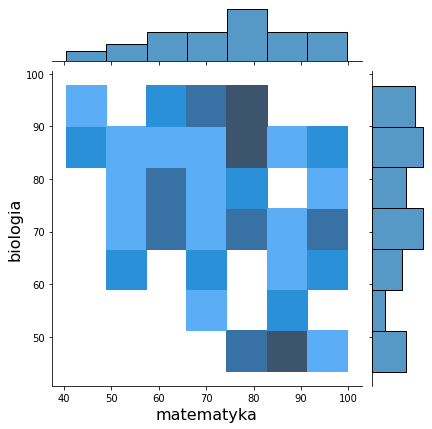

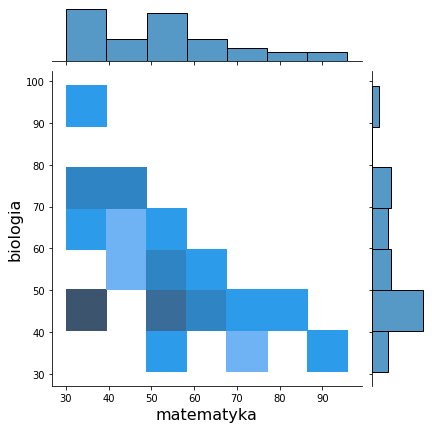

In [ ]:
import seaborn as sns

x = sns.jointplot(x="matematyka", y="biologia", data=df, kind='hist', hue="wynik")
x.set_axis_labels('matematyka', 'biologia', fontsize=16);

x = sns.jointplot(x="matematyka", y="biologia", data=df_passed, kind='hist')
x.set_axis_labels('matematyka', 'biologia', fontsize=16);

x = sns.jointplot(x="matematyka", y="biologia", data=df_failed, kind='hist')
x.set_axis_labels('matematyka', 'biologia', fontsize=16);

## Hipoteza
Dla przypomnienia _hipoteza_ w regresji logistycznej ma postać: 

$\qquad$ $h_\theta(x) = \frac{1}{1+\exp(-\theta x^T )}$.

W implementacji dobrze jest myśleć o tej funkcji tak:

$\qquad$ $h_\theta(x) = \frac{1}{1+f}$.

gdzie: $f = \exp(-\theta x^T)$

Proszę napisać funkcję ```logistic_func(x, theta)``` która:

* implementuje funkcję logistyczną
* jako argumenty przyjmuje parametry regresji logistycznej  $(\theta_{0}, \theta_{1}, ..., \theta_{i})$ oraz tablicę danych wejściowych $x$. 
* w kodzie fukcji proszę rozszerzyć tablicę $x$ o dodatkową kolumnę jedynek, by parametr $\theta_{0}$ był traktowany na tej same zasadzie co pozostałe parametry
* ze względu na stabilność numeryczną obliczeń ma ograniczony zakres zmienności. Proszę ograniczyć wartości wykładnika w mianowniku do zakresu  $\pm18$

**Ostrzeżenie:** x to tablica która może zawierać wiele kolumn i wiele wierszy.

**Wskazówka**: ograniczając zakres zwracanych wartości proszę skorzystać z funkcji np.where() zaaplikowanej do wektora wartości wykładnika.

Proszę sprawdzić działanie funkcji na następujących danych testowych:
```
theta = np.array([1,1,2])
x = np.array([[5,5],
              [5,6],
              [-5,-5],
              [-5,-8]])
```

In [ ]:
def logistic_func(theta, x):
    # dodaj kolumne jedynek
    x_expanded = np.column_stack((np.ones(x.shape[0]), x))
    # policz argument funkcji
    arg = np.dot(theta, x_expanded.T)
    # uzyj np.where żeby ograniczyc wartosci parmetru do [-18,18]
    arg = np.where(np.abs(arg) < 18, arg, np.sign(arg)*18)
    return 1.0/(1+np.exp(-arg))

theta = np.array([1,1,2])
x = np.array([[5,5],
              [5,6],
              [-5,-5],
              [-5,-8]])
res = logistic_func(theta, x)
# poprosze liste o podanym wymiarze na wyniku
assert res.shape == (4,)
print(res)


[9.99999887e-01 9.99999985e-01 8.31528028e-07 1.52299795e-08]


## Funkcja log-wiarygodności: 
Parametry regresji znajdujemy przez maksymalizację [funkcji log-wiarygodności](https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_6#Funkcja_wiarygodno.C5.9Bci):

$\qquad$ $l(\theta) = \log L(\theta) = \sum_{j=1}^m y^{(j)} \log h(x^{(j)}) + (1 - y^{(j)}) \log (1 - h(x^{(j)}))$,
gdzie:  

m - liczebność próbki

x - dane wejściowe, u nas wyniki z egaminów z matematyki i biologii

y - dane wyjściowe, u nas wynik rekrutacji na studia

h - postać zależności wyniku od danych wejściowych. U nas to jest funkcja logistyczna, czyli oczekujemy, że wzór y = h(x) dobrze opisuje zależnośc między danymi wejściowymi, a wyjściowymi.


<hr>

Proszę napisać funkcję ```log_likelihood(theta, x,y, model)``` która:

* implementuje funkcję log-wiarygodności
* jako argumenty przyjmuje parametry regresji logistycznej  $(\theta_{0}, \theta_{1}, ..., \theta_{i})$ oraz tablicę danych wejściowych $x, y$. 
* model dla którego szukamy parametrów $\theta_{i}$ w naszym przypadku to będzie funkcja logistyczna: ```logistic_func```

**Uwaga**: argument $theta$ musi być pierwszy 

In [ ]:
def log_likelihood(theta, x, y, model):
  h = model(theta, x)
  LLH = y*np.log(h) + (1-y)*np.log(1-h)
  LLH = np.sum(LLH,axis = 0)
    # Miejsce na twój kod. Użyj argumentu model zamiast konkretnej funkcji.
  return LLH


Maksymalizacja to zadanie optymalizacyjne - szukamy optymalnych parametrów, a kryterium optymalności to maksymalna wartość funckji log-wiarygodności.
W tym ćwiczeniu zrobimy to za pomocą funkcji optymalizacyjnych z modułu [<tt>scipy.optimize</tt>]( http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize). 


Wynikają z tego dwie konsekwencje:
* funkcje te są przystosowane do szukania minimów funkcji celu. Musimy więc podawać im jako argumenty funkcję minus log-wiarygodności
* niektóre algorytmy mogą działać szybciej jeśli zaimplementujemy jawnie postać pochodnej:

$\qquad$ $
\begin{array}{lcl}
\frac{\partial}{\partial \theta_i} l(\theta)  =\sum_{j=1}^m (y^{(j)}-h_\theta(x^{(j)}))x_i^{(j)}
\end{array}
$

Proszę napisać funkcję ```negative_log_likelihood(theta, x,y, model)``` która:

* zwraca funkcję log-wiarygodności pomnożoną przez $-1$

In [ ]:
def negative_log_likelihood(theta, x, y, model):
  return -log_likelihood(theta, x, y, model)

Proszę napisać funkcję ```log_likelihood_derivative(theta, x,y, model)``` oraz ```negative_log_likelihood_derivative(theta, x,y, model)``` które:

* zwraca funkcję pochodną log-wiarygodności
* zwraca funkcję pochodną log-wiarygodności pomnożoną przez $-1$

**Uwaga**: mnożąc przez $x_{i}$ trzeba uwzględnić kolumnę jedynek

In [ ]:
def log_likelihood_derivative(theta, x, y, model):
    # Miejsce na Twój kod. Pamiętaj, żeby dodać kolumnę jedynek do x.
    x_expanded = np.column_stack((np.ones(x.shape[0]), x))
    # 1. Policz wynik modelu dzialajacego na danych wejsciowych
    h = model(theta, x)
    # 2. Policz różnicę względem danych wyjściowcyh
    h_x = y-h
    # 3. Policz wartość pochodnej pamiętając o sumowaniu
    a = h_x*x_expanded
    result = theta - a
    # 4. zwróc wynik, wartość pochodnej we wszystkich kierunkach (kolumnach)
    assert result.shape == theta.shape
    return result

def negative_log_likelihood_derivative(theta, x, y, model):
    return -log_likelihood_derivative(theta, x, y, model)

## Procedura minimalizacji funkcji log-wiarygodności ze wsględu na parametry $\theta$ dla konkretnych danych.

W naszym przypadku mamy trzy parametry $\theta$ - mnożące odpowiednio 1, wynik z matematyki, wynik z biologii.

Proszę:
* zainicjalizować parametry $\theta_{0}, \theta_{1}, \theta_{2}$ na wartości 0.
* obliczyć wartość i pochodną funkcji wiarygodności na danych początkowych 

Poprawne wartości to:
```
Wartość funkcji log-wiarygodności dla zbioru testowego = -69.31471805599453
Wartość pochodnej funkcji log-wiarygodności dla zbioru testowego = [  10.         1200.92165893 1126.28422055]
```

In [ ]:
theta0 = np.array([0,0,0])
model = logistic_func

# wartość funkcji log-wiarygodności
llh = log_likelihood(theta0, df[["matematyka","biologia"]], df["wynik"], model)
# wartość pochodnej
#llh_derivative = log_likelihood_derivative(theta0, df[["matematyka", "biologia"]], df["wynik"], model)

print("Wartość funkcji log-wiarygodności dla zbioru testowego = {}".format(llh))
#print("Wartość pochodnej funkcji log-wiarygodności dla zbioru testowego = {}".format(llh_derivative))

Wartość funkcji log-wiarygodności dla zbioru testowego = -69.31471805599453


## Optymalizacja  

Funkcje optymalizujące zaczerpniemy z modułu scipy.optimize: ```scipy.optimize.fmin_bfgs```. Ponieważ funkcje te są zaimplementowane do mnimalizowania to zamiast maksymalizować funkcję low-wiarygodności będziemy minimalizować tą funkcje przemnożoną przez -1 czyli ```f=negative_log_likelihood``` oraz ```fprime=negative_log_likelihood_derivative```


* proszę wywołać funckję ```scipy.optimize.fmin_bfgs``` z obpowiednimi argumentami.
* proszę porównać liczbę wywołań i czas wykonywania komórki z i bez podania explicite postaci pochodnej
(https://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=%25time#cell-magics)

In [ ]:
%time
# ^ rozpoczecie mierzenia czasu dzieje sie tu

model = logistic_func

# znajdz optymalne parametry theta
theta_opt = so.fmin_bfgs(f=negative_log_likelihood, x0=theta0, args=(df[["matematyka","biologia"]], df["wynik"], model))
# policz log-wiarygodnosc z optymalnymi parametrami
llh = log_likelihood(theta_opt, df[["matematyka", "biologia"]], df["wynik"], model)

print('Optymalne wartości parametrów theta: {}'.format(theta_opt))
print("Wartość funkcji log-wiarygodności dla optymalnych parametrów: {}".format(llh))
#-20.349 theta_opt llh

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
         Current function value: 20.349770
         Iterations: 28
         Function evaluations: 516
         Gradient evaluations: 101
Optymalne wartości parametrów theta: [-25.1612356    0.20623092   0.20147081]
Wartość funkcji log-wiarygodności dla optymalnych parametrów: -20.349770159086937


## Wyniki
Wyniki regresji logistycznej możemy odbierać na dwa sposoby:
* obliczyć wartość hipotezy dla badanego wejścia i dopasowanych parametrów: miara ta ma interpretację prawdopodobieństwa przynależności wejścia do klasy 1,
* dopisać funkcję wykonującą klasyfikację, tzn. porównanie wartości hipotezy z 1/2: 
  * dla wartości hipotezy > 1/2 klasyfikacja zwraca 1, 
  * w przeciwnym razie 0.
  
  
Proszę napisać funkcję ```classification(theta, x)```  która:
* jako argument przyjmuje wektora parametrów modelu $\theta$, tablicę danych wejściowych $x$, oraz $model$
* zwraca listę klasyfikacyjną: $1$ gdy $model(x)>0.5$, a $0$ w przeciwnym przypadku

In [ ]:
def classification(theta, x, model):
    return model(theta,x) > 0.5

## Przewidywanie 

Proszę:

* korzystając z modelu ```logistic_func``` wraz z parametrami zwróconymi przez procedurę optymalizacyjną obliczyć prawdopobobieństwo zdania
  osoby, która uzyskała 20 pkt. z matematyki, oraz 80 z biologii.
* korzystając z funckji "classification" wyznaczyć czy osoba należy do   klasy $0$ czy $1$.

In [ ]:
# stworz dane odpowiadajace naszej osobie
x = np.array([[20, 80]])
# policz prawdopodobienstwo zdania
p = model(theta_opt,x)

print("Osoba z {} pkt z matematyki, oraz {} pkt. z biologii ma {}% szans na przyjęcie na studia.".format(x[0,0], x[0,1], round(p[0]*100,3)))

# sklasyfikuj osobę
class_number = classification(theta,x,logistic_func)
print("Osoba zalicza się do klasy: {}".format(class_number))

Osoba z 20 pkt z matematyki, oraz 80 pkt. z biologii ma 0.725% szans na przyjęcie na studia.
Osoba zalicza się do klasy: [ True]


Narysujmy uzyskany podział. Na tle punktów pokolorowanych zgodnie z przynależnością do klas dorysujemy prostą rozgraniczającą obszary "1" od "0".   Ma ona równanie 

$\qquad$ $h_\theta(x)=1/2$, 

tzn:

$\qquad$ $\theta x^T = 0$

czyli 

$\theta_0 +\theta_1 x_1 + \theta_2 x_2 =0 $

Przekształcając to do równania prostej we współrzędnych $(x_1,x_2)$ mamy:

$- \theta_2 x_2 = \theta_0 +\theta_1 x_1 $

$ x_2 = - \frac{1}{\theta_2}( \theta_0 +\theta_1 x_1 )$

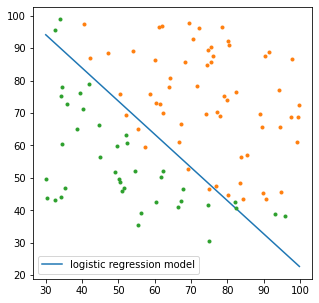

In [ ]:
df_passed = df[df["wynik"]==1]
df_failed = df[df["wynik"]==0]

fig, axes = plt.subplots(1,1, figsize=(5,5))
# narysuj tych co zdali na niebiesko, pamietaj o argumencie "label" dla czytelnosci
# narysuj tych co nie zdali na czerwono, pamietaj o argumencie "label" dla czytelnosci

# znajdz prostą
x = np.array([df["matematyka"].min(), df["matematyka"].max()])
y = -(theta_opt[0]+ theta_opt[1]*x)/theta_opt[2]

# rysowanie prostej i legendy
axes.plot(x,y, label="logistic regression model")
axes.plot(df_passed["matematyka"], df_passed["biologia"], '.')
axes.plot(df_failed["matematyka"], df_failed["biologia"], '.')

axes.legend();

## Część II: Walidacja - to na ćwiczenia w przyszłym tygodniu
Teoria do tej części znajduje się tu:

https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_Ocena_jakości_klasyfikacji

### Zastosowanie w naszym przykładzie
Dodamy teraz kross-walidację typu $leave-one-out$.
Po kolei odłożymy po jednym przykładzie ze zbioru uczącego i na takim zredukownaym zbiorze nauczymy regresję, a następnie sprawdzimy 
działanie modelu na odłożonym przykładzie:

<ol>
<li> ze zbioru uczącego odrzucamy jeden przykład </li>
<li> na pozostałych przykładach "trenujemy model", czyli znajdujemy parametry $\theta$ </li>
<li> sprawdzamy działanie modelu na odrzuconym wcześniej przykładzie</li>
<li> procedurę powtarzamy dla wszystkich przykładów w zbiorze uczącym </li>   
</ol> 

Proszę napisać funckję ```leave_one_out_CV(df, theta, model)```

która:
* przyjmuje zestaw uczący w postaci obiektu DataFrame, początkowych parametrów $\theta$, oraz model $model$
* wykonuje operację "leave-one-out" i tworzy listę wyników modelu dla każdego przykładu:

```
passed = np.append(passed, classification(theta_opt, df_left_out[["matematyka","biologia"]], model))
```

* dodaje do obiektu DataFrame kolumnę z wynikami modelu:

```
df["model"] = passed 
```   

In [ ]:
%time 

def leave_one_out_CV(df, theta0, model):
    # tutaj bedziemy wpisywac wyniki modelu
    passed = np.array([])
    # tworzymy kopie data frame
    df_with_model = df.copy()
    
    # pętla po wszystkich przykładach
    for leave_out_index in df.index:
        # 1. stworz dataframe bez jednego przykladu
        df_filtered = df[df.index != leave_out_index]
        # 2. znajdz optymalne parametry theta
        theta_opt = so.fmin_bfgs(f=negative_log_likelihood, x0=theta0, args=(df_filtered[["matematyka","biologia"]], df_filtered["wynik"], model))
        # 3. stworz dataframe z odrzuconego (pojedynczego) przykladu
        df_left_out = df[df.index == leave_out_index]
        # 4. dodajemy wynik modelu do poprzednich
        passed = np.append(passed, classification(theta_opt, df_left_out[["matematyka", "biologia"]], model))
    # Dodajemy wyniki modelu do df_with_model
    df_with_model["model"] = passed
    # zwracamy data frame powiekszony o kolumne z wynikami modelu
    return df_with_model
                        
theta0 = np.array([0,0,0])
model = logistic_func 
df_with_model = leave_one_out_CV(df, theta0, model)
print(df_with_model)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Optimization terminated successfully.
         Current function value: 20.251182
         Iterations: 22
         Function evaluations: 185
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 20.349728
         Iterations: 24
         Function evaluations: 165
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 20.304014
         Iterations: 20
         Function evaluations: 140
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 20.340082
         Iterations: 22
         Function evaluations: 230
         Gradient evaluations: 46
         Current function value: 20.347964
         Iterations: 21
         Function evaluations: 161
         Gradient evaluations: 32
         Current function value: 20.338839
         Iterations: 20
         Function evaluations: 281
   

Zdefiniujmy następujące przypadki gdy nasz model się myli lub podaje poprawny wynik:

* "True Positive" (TP):  stan faktyczny jest pozytywny (y=1) i klasyfikator się nie myli (wynik = 1)
* "True Negative" (TN):  stan faktyczny jest negatywny (y=0) i klasyfikator się nie myli (wynik = 0) 
* "False Positive" (FP): wynik fałszywie pozytywny (fałszywy alarm): stan faktyczny jest negatywny (y=0) ale klasyfikator się  myli (wynik = 1)
* "False Netative" (FN): przegapiony alarm: stan faktyczny jest pozytywny (y=1) i klasyfikator się myli (wynik = 0)

Proszę napisać kod, który oblicza TP, TN, FP, FN. Dla naszego zbioru uczącego powinniśmy uzyskać:
```
TP:  55
FP:  6
TN:  34
FN:  5
```   

**Wskazówka:** proszę zliczać liczbę wierszy w odpowiednio przefiltrowanym obiekcie DataFrame

In [ ]:
# podpowiedz: uzyj warunkow logicznych aby wybrac odpowiednie dane i pola shape aby dostac liczbe wierszy
tp = df_passed[df_with_model["model"]>0].shape[0]
fp = df_failed[df_with_model["model"]>0].shape[0]
tn = df_failed[df_with_model["model"]==0].shape[0]
fn = df_passed[df_with_model["model"]==0].shape[0]

print("TP = {}\nFP = {}\nTN = {}\nFN = {}".format(tp, fp, tn, fn))

TP = 55
FP = 6
TN = 34
FN = 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


## Krzywa ROC

Aby wykreślić krzywą ROC należy przeprowadzić klasyfikację dla wielu możliwych wartości progu dla hipotezy, powyżej którego uznajemy przypadek za należący do klasy 1. W tym celu należy zmodyfikować funckję ```leave_one_out_CV(df, theta0, model)``` tak by zapisywała prawdopodobieństwo, a nie wynik działania funkcji ```classification```

Proszę napisać funkcję ```leave_one_out_CV_with_prob(df, theta0, model)``` 
* która zapisuje kolumnę z prawdopodobieństwem zamiast wynikiem klasyfikacji

In [ ]:
%time 

def leave_one_out_CV_with_prob(df, theta0, model):
    # tutaj bedziemy wpisywac wyniki modelu (prawdopodobienstwa)
    prob = np.array([])
    # robimy kopie oryginalnych danych do ktorych dodamy kolumne
    df_with_model = df.copy()
    # petla po wszystkich przykladach
    for leave_out_index in df.index:
        # 1. stworz dataframe bez jednego przykladu
        df_filtered = df_with_model[df.index != leave_out_index]
        # 2. znajdz optymalne parametry theta
        theta_opt = so.fmin_bfgs(f=negative_log_likelihood, x0=theta0, args=(df_filtered[["matematyka","biologia"]], df_filtered["wynik"], model))
        # 3. stworz dataframe z odrzuconego (pojedynczego) przykladu
        df_left_out = df[df.index == leave_out_index]
        # 4. dodajemy wynik modelu do poprzednich
        prob = np.append(prob, model(theta_opt, df_left_out[["matematyka", "biologia"]]))
    # Dodajemy wyniki modelu (prawdopodobienstwa) do calego data frame
    df_with_model["prob"] = prob
    # zwracamy data frame powiekszony o kolumne z wynikami modelu (prawdopodobienstwami)
    return df_with_model
                        
theta0 = np.array([0,0,0])
model = logistic_func 
df_with_prob = leave_one_out_CV_with_prob(df, theta0, model)
print(df_with_prob)
#0.96

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
Optimization terminated successfully.
         Current function value: 20.251182
         Iterations: 22
         Function evaluations: 185
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 20.349728
         Iterations: 24
         Function evaluations: 165
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 20.304014
         Iterations: 20
         Function evaluations: 140
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 20.340082
         Iterations: 22
         Function evaluations: 230
         Gradient evaluations: 46
         Current function value: 20.347964
         Iterations: 21
         Function evaluations: 161
         Gradient evaluations: 32
         Current function value: 20.338839
         Iterations: 20
         Function evaluations: 28

Korzystając z biblioteki ```sklearn``` proszę narysować krzywą ROC oraz obliczyć pole pod nią ("area under ROC, AUC) dla naszego modelu.

**Wskazówka:** wpisać w Google hasło "scikit learn Receiver Operating Characteristic"

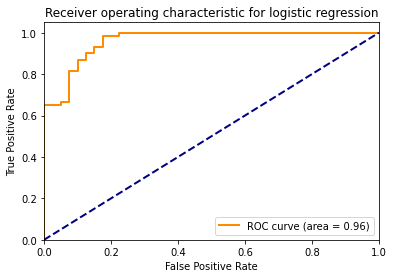

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
fpr_biol, tpr_biol, thresholds = dict(), dict(), dict()
fpr, tpr, _ = roc_curve(df_with_prob["wynik"], df_with_prob["prob"])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# narysujmy krzywą (diagonala) dla rzutu monetą (naiwny klasyfikator, najgorsze rozwiązanie)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc="lower right")
plt.show()

## Modyfikacja modelu

Proszę wykonać trening regresji logistycznej dla modelu, który używa wyniku tylko z jednego egzaminu i narysować na jednym rysunku krzywe ROC dla trzech wariantów:
* modelu używającego wyników z obu przedmiotów
* modelu używającego tylko wyników z matematyki
* modelu używającego tylko wyników z biologii

**Wskazówka**: należy przerobić funkcję ```leave_one_out_CV_with_prob``` tak by wykonywała obliczenia dla wszystkich trzech wariantów

In [ ]:
%time

def leave_one_out_CV_many_models(df, theta0, model):
    # tu zapisujemy wszystkie prawdopodobienstwa
    prob = np.array([])
    # tu tylko dla matematyki
    prob_math = np.array([])
    # tu tylko dla biologii
    prob_biol = np.array([])
    # tu robimy kopie
    df_with_model = df.copy()
    
    for leave_out_index in df.index:
        # robimy podobnie jak poprzednio, ale tym razem 3 razy: dla obu dziedzin, tylko dla majcy, tylko dla biologii
        # 1. stworz dataframe bez jednego przykladu
        df_filtered = df_with_model[df.index != leave_out_index]
        # 2. znajdz optymalne parametry theta
        theta_opt = so.fmin_bfgs(f=negative_log_likelihood, x0=theta0, args=(df_filtered[["matematyka","biologia"]], df_filtered["wynik"], model), disp = False)
        # 3. stworz dataframe z odrzuconego (pojedynczego) przykladu
        df_left_out = df[df.index == leave_out_index]
        # 4. dodajemy wynik modelu do poprzednich
        prob = np.append(prob, classification(theta_opt, df_left_out[["matematyka", "biologia"]], model))
    # Dodajemy wyniki modelu (prawdopodobienstwa) do calego data frame
    #prob_prob["model"] = prob
        

        #tu na mnie krzyczy, że gdy biorę jeden przedmiot, to nie zgazają się wymiary macierzy zarówno dla matematyki jak i biologii przy logistic_func
        # 1. stworz dataframe bez jednego przykladu
        df_filtered_math = df_with_model[df.index != leave_out_index]
        # 2. znajdz optymalne parametry theta

        theta_opt_math = so.fmin_bfgs(f=negative_log_likelihood, x0=theta0[0:2], args=(df_filtered_math[["matematyka"]], df_filtered_math["wynik"], model), disp = False)
        # 3. stworz dataframe z odrzuconego (pojedynczego) przykladu
        df_left_out_math = df[df.index == leave_out_index]
        # 4. dodajemy wynik modelu do poprzednich
        prob_math = np.append(prob_math, classification(theta_opt_math, df_left_out_math[["matematyka"]], model))
    # Dodajemy wyniki modelu (prawdopodobienstwa) do calego data frame
    #df_math["model"] = prob1
    # 1. stworz dataframe bez jednego przykladu
        df_filtered_biol = df_with_model[df.index != leave_out_index]
        # 2. znajdz optymalne parametry theta
        theta_opt_biol = so.fmin_bfgs(f=negative_log_likelihood, x0=theta0[0:2], args=(df_filtered_biol[["biologia"]], df_filtered_biol["wynik"], model), disp = False)
        # 3. stworz dataframe z odrzuconego (pojedynczego) przykladu
        df_left_out_biol = df[df.index == leave_out_index]
        # 4. dodajemy wynik modelu do poprzednich
        prob_biol = np.append(prob_biol, classification(theta_opt_biol, df_left_out_biol[["biologia"]], model))
    # Dodajemy wyniki modelu (prawdopodobienstwa) do calego data frame
    #df_biol["model"] = prob2
        ##########

    # dodajemy kolumny do data frame i zwracamy
    df_with_model["model"] = prob
    df_with_model["math"] = prob_math
    df_with_model["biol"] = prob_biol
    return df_with_model
                        
theta0 = np.array([0,0,0])
model = logistic_func 
df_with_prob = leave_one_out_CV_many_models(df, theta0, model)
print(df_with_prob)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
    matematyka   biologia  wynik  model  math  biol
0    34.623660  78.024693      0    0.0   0.0   1.0
1    30.286711  43.894998      0    0.0   0.0   0.0
2    35.847409  72.902198      0    0.0   0.0   1.0
3    60.182599  86.308552      1    1.0   1.0   1.0
4    79.032736  75.344376      1    1.0   1.0   1.0
..         ...        ...    ...    ...   ...   ...
95   83.489163  48.380286      1    1.0   1.0   0.0
96   42.261701  87.103851      1    1.0   0.0   1.0
97   99.315009  68.775409      1    1.0   1.0   1.0
98   55.340018  64.931938      1    0.0   0.0   1.0
99   74.775893  89.529813      1    1.0   1.0   1.0

[100 rows x 6 columns]


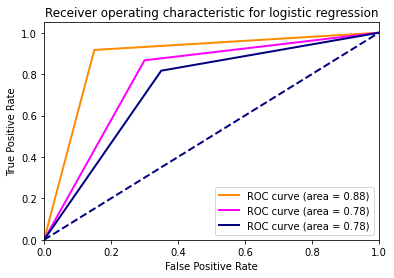

In [ ]:
# analogicznie jak poprzednio, ale tym razem liczymy i plotujemy 3 ROC 
fpr, tpr, thresholds =  dict(), dict(), dict()
fpr, tpr, _ = roc_curve(df_with_prob["wynik"], df_with_prob["model"])
fpr_math, tpr_math, thresholds =  dict(), dict(), dict()
fpr_math, tpr_math, _ = roc_curve(df_with_prob["wynik"], df_with_prob["math"])
fpr_biol, tpr_biol, thresholds =  dict(), dict(), dict()
fpr_biol, tpr_biol, _ = roc_curve(df_with_prob["wynik"], df_with_prob["biol"])

roc_auc =  auc(fpr, tpr)
roc_auc_math =  auc(fpr_math, tpr_math)
roc_auc_biol =  auc(fpr_biol, tpr_biol)

plt.figure()
lw = 2
# uzupelnij kod poniżej
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_math, tpr_math, color='magenta',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_math)
plt.plot(fpr_biol, tpr_biol, color='navy',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_math)
#
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc="lower right")
plt.show()

## Zastosowanie do innego rodzaju danych

Proszę przeprowadzić procedurę treningu i narysować krzywą ROC dla danych gdzie występuje inny podział między klasami:


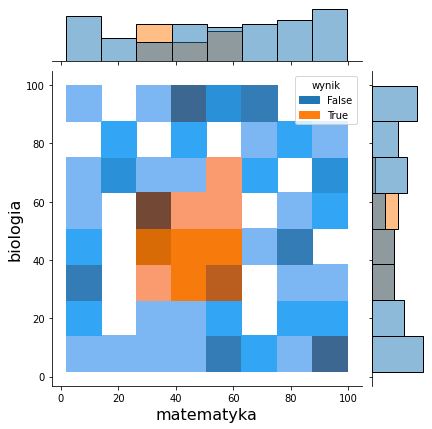

In [ ]:
nPoints = 100
x = 100*np.random.random_sample(nPoints)
y = 100*np.random.random_sample(nPoints)

df = pd.DataFrame(data=x, columns=["matematyka"])
df["biologia"] = y
# tworzymy nowe dane
df["wynik"] = np.sqrt((x-50)**2 + (y-50)**2)<25
# narysuj dwuwymiarowy wykres aby zobaczyc korelacje
x = sns.jointplot(x="matematyka", y="biologia", data=df, kind='hist', hue="wynik")
x.set_axis_labels('matematyka', 'biologia', fontsize=16);

In [ ]:
theta0 = np.array([0,0,0])
model = logistic_func
# policz prawdopodobienstwa z modelu przy uzyciu walidacji leave_one_out
df_with_prob = leave_one_out_CV_with_prob(df,theta0,model)
print(df_with_prob)

Optimization terminated successfully.
         Current function value: 20.251182
         Iterations: 22
         Function evaluations: 185
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 20.349728
         Iterations: 24
         Function evaluations: 165
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 20.304014
         Iterations: 20
         Function evaluations: 140
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 20.340082
         Iterations: 22
         Function evaluations: 230
         Gradient evaluations: 46
         Current function value: 20.347964
         Iterations: 21
         Function evaluations: 161
         Gradient evaluations: 32
         Current function value: 20.338839
         Iterations: 20
         Function evaluations: 281
         Gradient evaluations: 56
         Current function value:

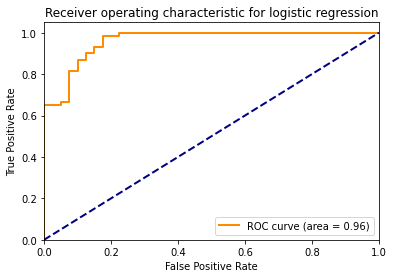

In [ ]:
# narysuj ŁADNY wykres z krzywą ROC i wypisz AUC w legendzie
fpr_biol, tpr_biol, thresholds = dict(), dict(), dict()
fpr, tpr, _ = roc_curve(df_with_prob["wynik"], df_with_prob["prob"])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# narysujmy krzywą (diagonala) dla rzutu monetą (naiwny klasyfikator, najgorsze rozwiązanie)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc="lower right")
plt.show()

## Co można zrobić by poprawić działanie modelu na takich danych?

Napisz funkcję logistic_func_1(theta, x) która będzie działać podobnie do oryginalnej, ale dodaj w niej do oryginalnych danych 3 kolumny: kolumnę jedynek (tak jak poprzednio), kolumnę x1^2, kolumnę x2^2, gdzie x1 i x2 to wyniki z matematyki i biologii odpowiednio.

Następnie uzupełnij funkcję leave_one_out_CV_with_prob(df, theta0, model), analogicznie do poprzednich funkcji. Funkcja ma wykonać walidację leave-one-out i zwrocić prawdopodbieństwo uzyskane z modelu.

In [ ]:
%time

def logistic_func_1(theta, x):
    # dodaj kolumne jedynek
    x_expanded = np.column_stack((x, np.power(x, [2,2])))
    x_expanded1 = np.column_stack((np.ones(x_expanded.shape[0]), x_expanded))
    # policz argument funkcji
    arg = np.dot(theta, x_expanded1.T)
    # uzyj np.where żeby ograniczyc wartosci parmetru do [-18,18]
    arg = np.where(np.abs(arg) < 18, arg, np.sign(arg)*18)
    return 1.0/(1+np.exp(-arg))

def leave_one_out_CV_with_prob(df, theta0, model):
    
    prob = np.array([])
    df_with_model = df.copy()
    # napisz petle po przypadkach analogicznie jak poprzednio
    for leave_out_index in df.index:
        # 1. stworz dataframe bez jednego przykladu
        df_filtered = df_with_model[df.index != leave_out_index]
        # 2. znajdz optymalne parametry theta
        theta_opt = so.fmin_bfgs(f=negative_log_likelihood, x0=theta0, args=(df_filtered[["matematyka","biologia"]], df_filtered["wynik"], model))
        # 3. stworz dataframe z odrzuconego (pojedynczego) przykladu
        df_left_out = df[df.index == leave_out_index]
        # 4. dodajemy wynik modelu do poprzednich
        prob = np.append(prob, model(theta_opt, df_left_out[["matematyka", "biologia"]]))
    # dodaj prob jako nową kolumnę
    df_with_model["prob"] = prob
    return df_with_model

theta0 = np.array([0,0,0,0,0])
model = logistic_func_1 
df_with_prob = leave_one_out_CV_with_prob(df, theta0, model)
print(df_with_prob)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 41
         Function evaluations: 385
         Gradient evaluations: 55
         Current function value: 0.000004
         Iterations: 42
         Function evaluations: 740
         Gradient evaluations: 104
         Current function value: 0.000005
         Iterations: 42
         Function evaluations: 859
         Gradient evaluations: 121
         Current function value: 0.000002
         Iterations: 44
         Function evaluations: 725
         Gradient evaluations: 102
         Current function value: 0.000003
         Iterations: 42
         Function evaluations: 880
         Gradient evaluations: 124
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 41
         Function evaluations: 378
         Gradient evaluations: 54
         Current function value: 0.000002
    

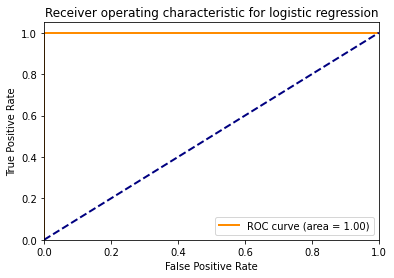

In [ ]:
# narysuj ładny wykres ROC tak jak poprzednio ale dla nowego modelu
fpr_biol, tpr_biol, thresholds = dict(), dict(), dict()
fpr, tpr, _ = roc_curve(df_with_prob["wynik"], df_with_prob["prob"])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# narysujmy krzywą (diagonala) dla rzutu monetą (naiwny klasyfikator, najgorsze rozwiązanie)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc="lower right")
plt.show()